In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def transformer_stats(depth: int, d_model: int, d_ff: int, seq_len: int):
    stats = {}

    # params
    params = 0
    # attention
    params += d_model             # RMS scale
    params += d_model * 3*d_model # QKV
    params += d_model * d_model   # Out
    # feedforward
    params += d_model             # RMS scale
    params += d_model * 2*d_ff    # GLU up
    params += d_model * d_ff      # GLU down

    params *= depth
    params += d_model # Output head norm

    stats["params"] = params

    # FLOPs (matmuls)
    flops = 0
    # attention
    flops += seq_len * (2 * d_model * 3*d_model) # QKV
    flops += seq_len * seq_len * d_model * 2     # A=QK
    flops += seq_len * seq_len * d_model * 2     # AV
    flops += seq_len * (2 * d_model * d_model)   # Out
    # feedforward
    flops += seq_len * (2 * d_model * 2*d_ff)
    flops += seq_len * (2 * d_model * d_ff)

    flops *= depth

    stats["flops_per_token"] = flops // seq_len

    return stats

In [60]:
device_flops = 71e12
efficiency = 0.6
act_device_flops = efficiency * device_flops

seconds = 60*7.5

total_flops = seconds * act_device_flops
total_flops

1.917e+16

In [51]:
batch_size = 32
seq_len = 256

depth_width_ratio = 25
d_model = 512+64

d_ff = int(64*((d_model*4*(2/3)) // 64))

print(f"{d_model=}, depth={round(d_model/depth_width_ratio)}, {d_ff=}")

d_model=576, depth=23, d_ff=1536


In [43]:
model_configs = [
    {"depth": 5, "d_model":   128, "d_ff":  320, "seq_len": seq_len},
    {"depth": 10, "d_model":  256, "d_ff":  640, "seq_len": seq_len},
    {"depth": 13, "d_model":  320, "d_ff":  832, "seq_len": seq_len},
    {"depth": 15, "d_model":  384, "d_ff": 1024, "seq_len": seq_len},
    {"depth": 18, "d_model":  448, "d_ff": 1152, "seq_len": seq_len},
    {"depth": 20, "d_model":  512, "d_ff": 1344, "seq_len": seq_len},
    {"depth": 23, "d_model":  576, "d_ff": 1536, "seq_len": seq_len},
    {"depth": 26, "d_model":  640, "d_ff": 1664, "seq_len": seq_len},
    {"depth": 31, "d_model":  768, "d_ff": 2048, "seq_len": seq_len},
    {"depth": 36, "d_model":  896, "d_ff": 2368, "seq_len": seq_len},
    {"depth": 41, "d_model": 1024, "d_ff": 2688, "seq_len": seq_len},
]

In [44]:
for mc in model_configs:
    stats = transformer_stats(mc["depth"], mc["d_model"], mc["d_ff"], mc["seq_len"])
    total_tokens = total_flops / ((stats["flops_per_token"] / 2) * 6)
    tokens_per_batch = batch_size * seq_len
    total_steps = total_tokens / tokens_per_batch
    mc["params"] = stats["params"]
    mc["flops_per_token"] = stats["flops_per_token"]
    mc["total_flops"] = total_flops
    mc["total_steps"] = round(total_steps)
    print(mc)

{'depth': 5, 'd_model': 128, 'd_ff': 320, 'seq_len': 256, 'params': 943488, 'flops_per_token': 2539520, 'total_flops': 7.668e+16, 'total_steps': 1228625}
{'depth': 10, 'd_model': 256, 'd_ff': 640, 'seq_len': 256, 'params': 7542016, 'flops_per_token': 17694720, 'total_flops': 7.668e+16, 'total_steps': 176330}
{'depth': 13, 'd_model': 320, 'd_ff': 832, 'seq_len': 256, 'params': 15716800, 'flops_per_token': 35676160, 'total_flops': 7.668e+16, 'total_steps': 87457}
{'depth': 15, 'd_model': 384, 'd_ff': 1024, 'seq_len': 256, 'params': 26553984, 'flops_per_token': 58982400, 'total_flops': 7.668e+16, 'total_steps': 52899}
{'depth': 18, 'd_model': 448, 'd_ff': 1152, 'seq_len': 256, 'params': 42336448, 'flops_per_token': 92897280, 'total_flops': 7.668e+16, 'total_steps': 33587}
{'depth': 20, 'd_model': 512, 'd_ff': 1344, 'seq_len': 256, 'params': 62280192, 'flops_per_token': 135004160, 'total_flops': 7.668e+16, 'total_steps': 23111}
{'depth': 23, 'd_model': 576, 'd_ff': 1536, 'seq_len': 256, 'p

In [102]:
45+9

54

In [398]:
model_results = [
    # 1.917e+16 FLOPs
    # ...

    
    # 7.668e+16 FLOPs
    # {'depth':  5, 'd_model':  128, 'd_ff':  320, 'seq_len': 256, 'params':     943_488, 'flops_per_token':    2_539_520, 'total_flops': 7.668e+16, 'total_steps': 1228625, 'lr':   3e-4, 'min_valid_loss': 4.0},
    
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':   3e-4, 'min_valid_loss': 3.8506069779396057},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':   9e-4, 'min_valid_loss': 3.7916154861450195},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':  18e-4, 'min_valid_loss': 3.7921804785728455},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':  27e-4, 'min_valid_loss': 3.7581790486971536},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':  36e-4, 'min_valid_loss': 3.752914845943451},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':  45e-4, 'min_valid_loss': 3.7440483768781028},
    {'depth': 10, 'd_model':  256, 'd_ff':  640, 'seq_len': 256, 'params':   7_542_016, 'flops_per_token':   17_694_720, 'total_flops': 7.668e+16, 'total_steps':  176330, 'lr':  54e-4, 'min_valid_loss': 3.7524999380111694},

    {'depth': 13, 'd_model':  320, 'd_ff':  832, 'seq_len': 256, 'params':  15_716_800, 'flops_per_token':   35_676_160, 'total_flops': 7.668e+16, 'total_steps':   87457, 'lr':  18e-4, 'min_valid_loss': 3.7271199226379395},
    {'depth': 13, 'd_model':  320, 'd_ff':  832, 'seq_len': 256, 'params':  15_716_800, 'flops_per_token':   35_676_160, 'total_flops': 7.668e+16, 'total_steps':   87457, 'lr':  27e-4, 'min_valid_loss': 3.7156808376312256},
    {'depth': 13, 'd_model':  320, 'd_ff':  832, 'seq_len': 256, 'params':  15_716_800, 'flops_per_token':   35_676_160, 'total_flops': 7.668e+16, 'total_steps':   87457, 'lr':  36e-4, 'min_valid_loss': 5.813830455144246},
    {'depth': 13, 'd_model':  320, 'd_ff':  832, 'seq_len': 256, 'params':  15_716_800, 'flops_per_token':   35_676_160, 'total_flops': 7.668e+16, 'total_steps':   87457, 'lr':  45e-4, 'min_valid_loss': None},
    
    {'depth': 15, 'd_model':  384, 'd_ff': 1024, 'seq_len': 256, 'params':  26_553_984, 'flops_per_token':   58_982_400, 'total_flops': 7.668e+16, 'total_steps':   52899, 'lr':   3e-4, 'min_valid_loss': 3.7982228795687356},
    {'depth': 15, 'd_model':  384, 'd_ff': 1024, 'seq_len': 256, 'params':  26_553_984, 'flops_per_token':   58_982_400, 'total_flops': 7.668e+16, 'total_steps':   52899, 'lr':   9e-4, 'min_valid_loss': 3.734954277674357},
    {'depth': 15, 'd_model':  384, 'd_ff': 1024, 'seq_len': 256, 'params':  26_553_984, 'flops_per_token':   58_982_400, 'total_flops': 7.668e+16, 'total_steps':   52899, 'lr':  18e-4, 'min_valid_loss': 3.706389546394348},
    {'depth': 15, 'd_model':  384, 'd_ff': 1024, 'seq_len': 256, 'params':  26_553_984, 'flops_per_token':   58_982_400, 'total_flops': 7.668e+16, 'total_steps':   52899, 'lr':  27e-4, 'min_valid_loss': None},

    {'depth': 18, 'd_model':  448, 'd_ff': 1152, 'seq_len': 256, 'params':  42_336_448, 'flops_per_token':   92_897_280, 'total_flops': 7.668e+16, 'total_steps':   33587, 'lr':   9e-4, 'min_valid_loss': 3.8258202274640403},
    {'depth': 18, 'd_model':  448, 'd_ff': 1152, 'seq_len': 256, 'params':  42_336_448, 'flops_per_token':   92_897_280, 'total_flops': 7.668e+16, 'total_steps':   33587, 'lr':   9e-4, 'min_valid_loss': 3.7197481592496238},
    {'depth': 18, 'd_model':  448, 'd_ff': 1152, 'seq_len': 256, 'params':  42_336_448, 'flops_per_token':   92_897_280, 'total_flops': 7.668e+16, 'total_steps':   33587, 'lr':  18e-4, 'min_valid_loss': 4.565386533737183},

    {'depth': 20, 'd_model':  512, 'd_ff': 1344, 'seq_len': 256, 'params':  62_280_192, 'flops_per_token':  135_004_160, 'total_flops': 7.668e+16, 'total_steps':   23111, 'lr':   1e-4, 'min_valid_loss': 4.251430074373881},
    {'depth': 20, 'd_model':  512, 'd_ff': 1344, 'seq_len': 256, 'params':  62_280_192, 'flops_per_token':  135_004_160, 'total_flops': 7.668e+16, 'total_steps':   23111, 'lr':   3e-4, 'min_valid_loss': 3.8821765780448914},
    {'depth': 20, 'd_model':  512, 'd_ff': 1344, 'seq_len': 256, 'params':  62_280_192, 'flops_per_token':  135_004_160, 'total_flops': 7.668e+16, 'total_steps':   23111, 'lr':   9e-4, 'min_valid_loss': 3.7999677856763205},
    {'depth': 20, 'd_model':  512, 'd_ff': 1344, 'seq_len': 256, 'params':  62_280_192, 'flops_per_token':  135_004_160, 'total_flops': 7.668e+16, 'total_steps':   23111, 'lr':  18e-4, 'min_valid_loss': 4.894144376118978},
    {'depth': 20, 'd_model':  512, 'd_ff': 1344, 'seq_len': 256, 'params':  62_280_192, 'flops_per_token':  135_004_160, 'total_flops': 7.668e+16, 'total_steps':   23111, 'lr':  27e-4, 'min_valid_loss': 5.652546604474385},

    # {'depth': 23, 'd_model':  576, 'd_ff': 1536, 'seq_len': 256, 'params':  91_597_248, 'flops_per_token':  196_706_304, 'total_flops': 7.668e+16, 'total_steps':  15862, 'lr':  27e-4, 'min_valid_loss': },
      
    # {'depth': 26, 'd_model':  640, 'd_ff': 1664, 'seq_len': 256, 'params': 125_699_200, 'flops_per_token':  268_369_920, 'total_flops': 7.668e+16, 'total_steps':  11626, 'lr':   3e-4, 'min_valid_loss': },
     
    # {'depth': 31, 'd_model':  768, 'd_ff': 2048, 'seq_len': 256, 'params': 219_462_912, 'flops_per_token':  463_208_448, 'total_flops': 7.668e+16, 'total_steps':   6736, 'lr':   3e-4, 'min_valid_loss': },
     
    # {'depth': 36, 'd_model':  896, 'd_ff': 2368, 'seq_len': 256, 'params': 344_817_536, 'flops_per_token':  722_534_400, 'total_flops': 7.668e+16, 'total_steps':   4318, 'lr':   3e-4, 'min_valid_loss': },
     
    # {'depth': 41, 'd_model': 1024, 'd_ff': 2688, 'seq_len': 256, 'params': 510_610_432, 'flops_per_token': 1_064_042_496, 'total_flops': 7.668e+16, 'total_steps':   2932, 'lr':   3e-4, 'min_valid_loss': },
]
model_results = pd.DataFrame(model_results)

In [399]:
min_results = model_results.groupby(["depth", "d_model", "d_ff", "seq_len", "params", "total_flops"], as_index=False)["min_valid_loss"].min()

In [400]:
min_results

,depth,d_model,d_ff,seq_len,params,total_flops,min_valid_loss
0,10,256,640,256,7542016,7.668000e+16,3.744048
1,13,320,832,256,15716800,7.668000e+16,3.715681
2,15,384,1024,256,26553984,7.668000e+16,3.706390
3,18,448,1152,256,42336448,7.668000e+16,3.719748
4,20,512,1344,256,62280192,7.668000e+16,3.799968


In [401]:
from scipy.optimize import curve_fit

In [402]:
x_fit = np.log2(min_results["params"].values)
coeffs = np.polyfit(x_fit, min_results["min_valid_loss"].values, deg=2, )

In [403]:
a, b, c = coeffs

In [404]:
a, b, c

(np.float64(0.02914340283076181),
 np.float64(-1.407813571118561),
 np.float64(20.70118267031809))

In [405]:
p = np.poly1d(coeffs)

In [406]:
dp = p.deriv()          # derivative polynomial
critical_points = dp.r   # roots of derivative

In [407]:
crit_real = critical_points[np.isreal(critical_points)].real
crit_y = a*crit_real**2 + b*crit_real + c
round(float(crit_real[0]) / 1e6, 1), float(crit_y[0])

(0.0, 3.69957288460704)

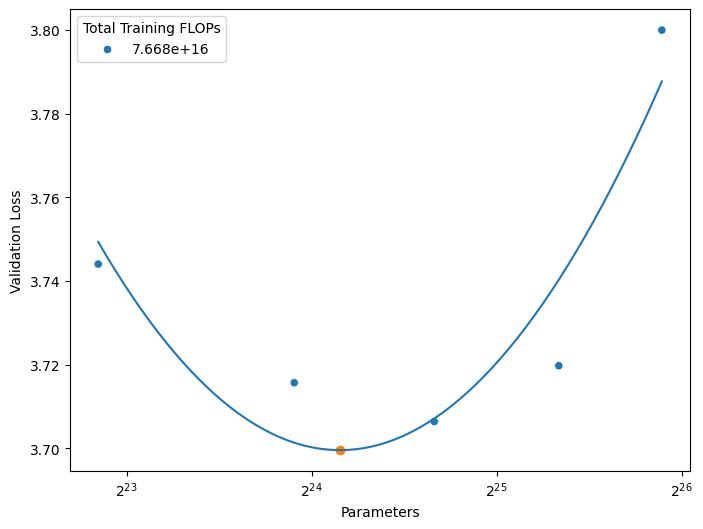

In [408]:
fig, ax = plt.subplots(figsize=(8, 6))

g = sns.scatterplot(
    data=min_results,
    x="params",
    y="min_valid_loss",
    hue="total_flops",
    ax=ax,
    palette="tab20",
)

g.legend().set_title("Total Training FLOPs")

x_plot = np.linspace(x_fit.min(), x_fit.max(), 200)
y_plot = a * x_plot**2 + b * x_plot + c
ax.plot(2**x_plot, y_plot)

ax.scatter([2**crit_real], [crit_y])


ax.set_xscale("log", base=2)
ax.set_xlabel("Parameters")
ax.set_ylabel("Validation Loss")


plt.show()